## This project deals with Attrition in human resources which is nothing but the  gradual loss of employees overtime. 

## High attrition is problematic for companies. 

## Our aim is to predict a model for human Resource Department to predict the Attrition.Let's check that ,

Importing required libraries for this project

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [2]:
df = pd.read_csv("hr.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


There are 1470 rows and 35 columns and we dont know which columns are important and which are not.
We will check this further and also we have categorical and numerical columns in the dataset

In [3]:
df.info()   ## This will give the information about each column data types,null count , memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Describe () function will give the summary of the dataset and will show for numerical columns only through this function.

This will help us to see the count ,mean,Standard Deviation, min and max values and quantile values and this will help us to do the analysis on outliers exist or not and on for checking the null values based on count of data one ach column.

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# viewing the categorical data describe() function,

df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Upon checking the null values in dataset, We dont have any null values in dataset.So we will proceed to next step,

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We found that three columns -- StandardHours,Over18,EmployeeCount is having only one value and we will drop these columns

In [8]:
df = df.drop(columns = ['StandardHours','Over18','EmployeeCount'],axis = 1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


We will see how the data has been distributed in a dataset through graphs (visualization technique)

* This is the univariate graph which explains all the columns in a single graph
* As we can see that some columns are normally distributed like age,education
* Some columns like daily rate,monthly rate, hourly rate,employee number are distributed wholly like uniform
* Most of the remaining columns are rigt skewed.

We can tell that there are outliers/ skewness exist in most of the columns from this below pictorial graph.

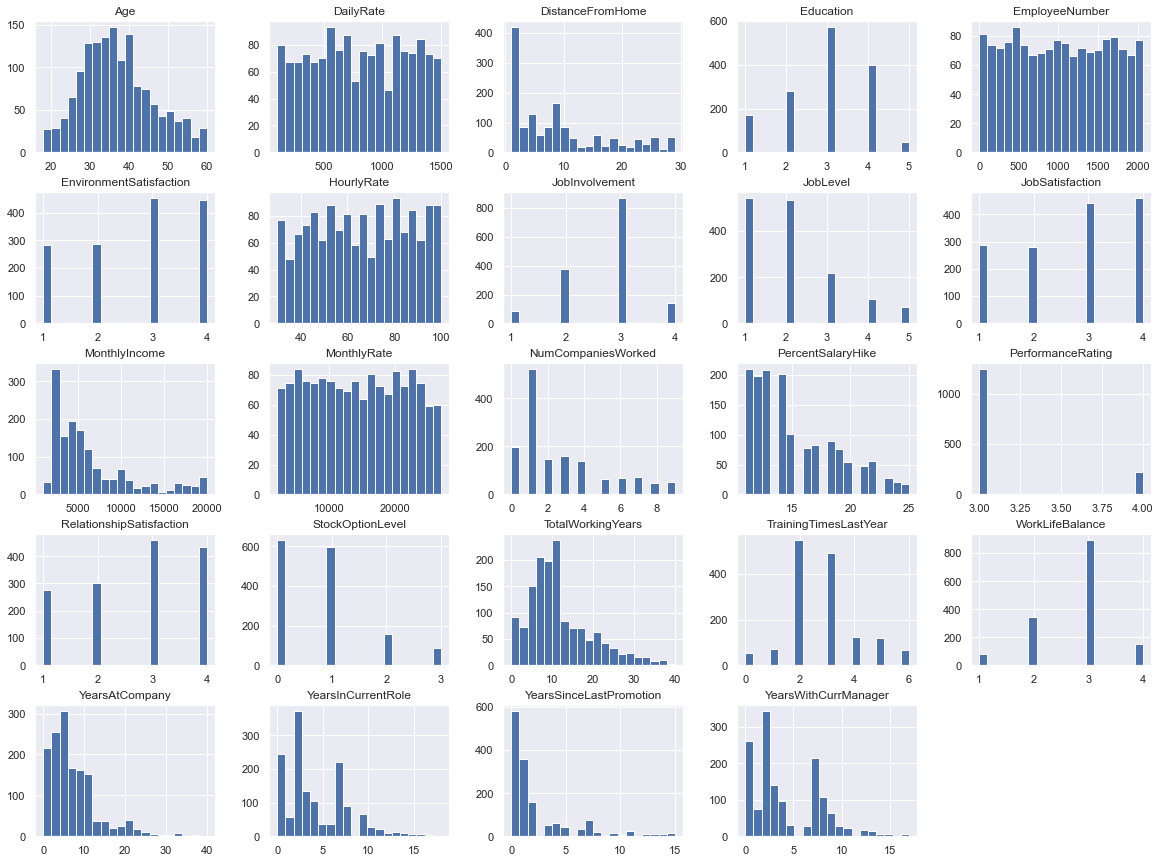

In [9]:
sns.set_theme()
df.hist(figsize = (20,15), bins = 20)
plt.show()

## We will split the categorical and numerical data and will do our analysis on how the data has been Distributed on the dataset to get an idea about each and every column

In [10]:
num = df.select_dtypes(exclude = object)
cat = df.select_dtypes(include = object)

In [11]:
cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


We splitted the dataset by categorical and numerical and we will see now how the categorical data has been distributed

<AxesSubplot:xlabel='Attrition', ylabel='count'>

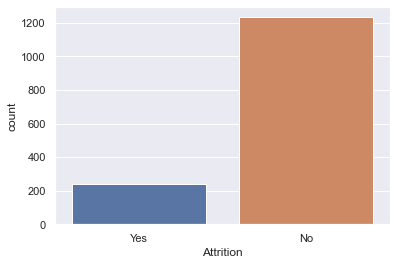

In [12]:
# There is a class imbalance on this column and this will be handled later in this part.
sns.countplot(cat['Attrition'])   # target variable

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

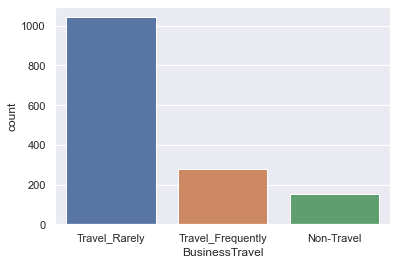

In [13]:
# We can see from the below graph that it shows that employess who travel rare is more in count

sns.countplot(cat['BusinessTravel'])

<AxesSubplot:xlabel='Department', ylabel='count'>

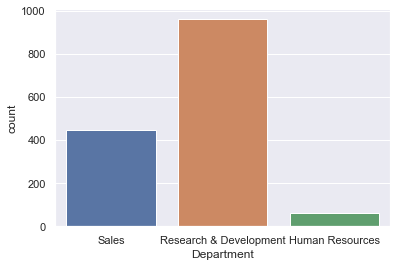

In [14]:
# This plot shows that most of the employess are from "Research and Development" department.

sns.countplot(cat['Department']) 

<AxesSubplot:xlabel='EducationField', ylabel='count'>

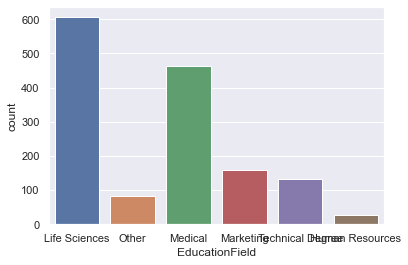

In [15]:
# This plot shows that most of the employess background which is Eductaion belongs to "Life Science".

sns.countplot(cat['EducationField'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

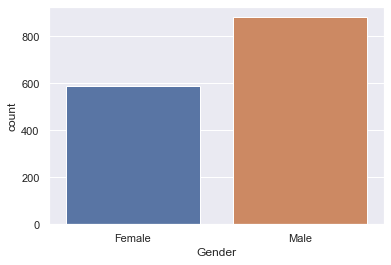

In [16]:
# This plot shows that most of the employees are "Male"

sns.countplot(cat['Gender'])

<AxesSubplot:xlabel='JobRole', ylabel='count'>

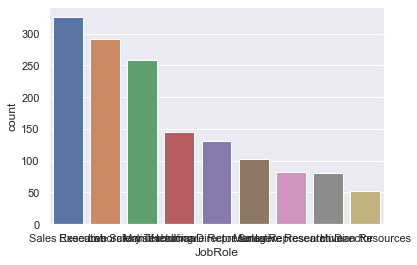

In [17]:
# This plot shows that the employee job roles whose count is high is "Sales Executive"

sns.countplot(cat['JobRole'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

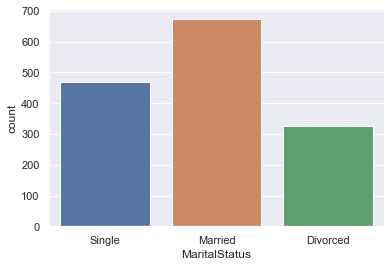

In [18]:
# This plot explains that most of the employees are "Married"

sns.countplot(cat['MaritalStatus'])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

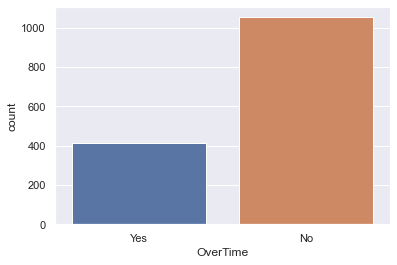

In [19]:
# this clearly shows that employees are not doing overtime

sns.countplot(cat['OverTime'])

Gonna apply Label encoding technique to convert the categorical dat into numerical data

In [20]:
le = LabelEncoder()
cat = cat.apply(le.fit_transform)

In [21]:
cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


We will see how the data has been distributed through Numerical data as well through DISTPLOT.

In [22]:
num

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


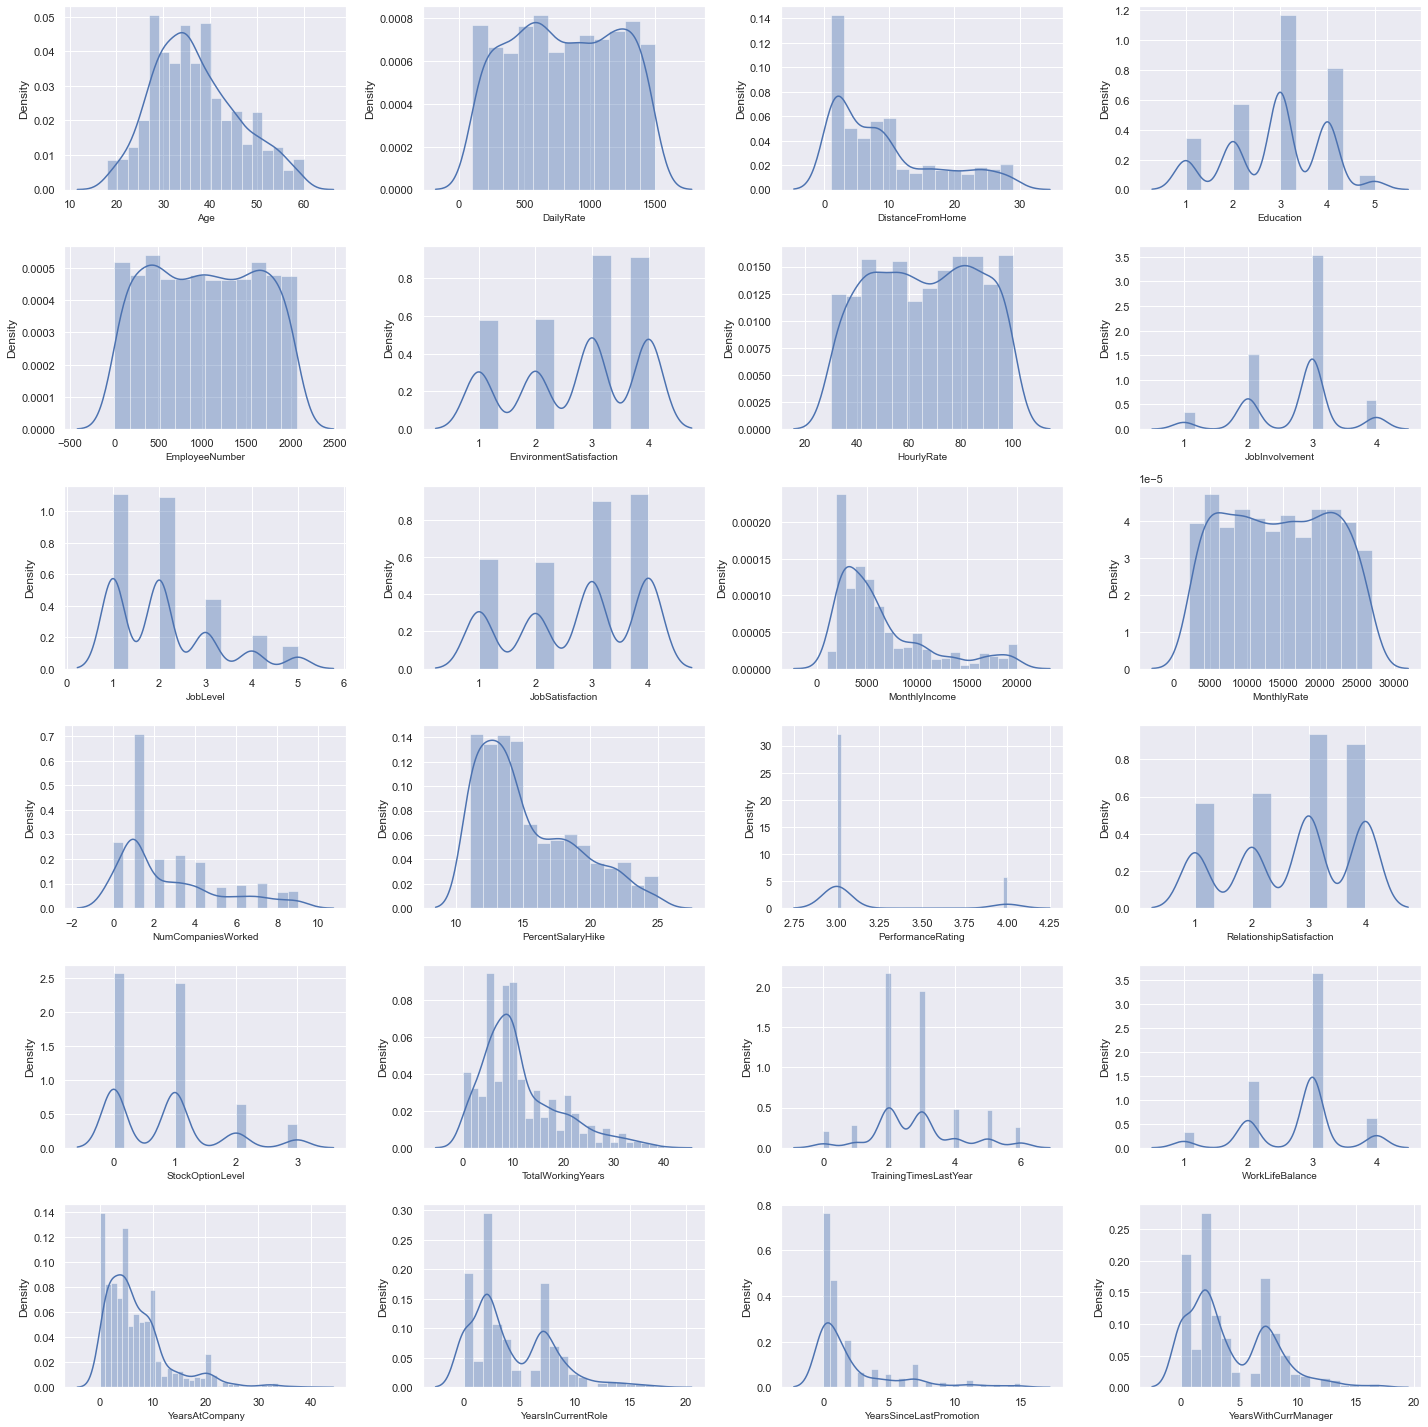

In [23]:
plt.figure(figsize = (20,20))
pltnumber = 1

for column in num:
    if pltnumber<=24:
        ax = plt.subplot(6,4,pltnumber)       
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

* Above plot shows that most of the columns are skewed righ side and outliers exist in some columns as well.
* We can see outliers in Monthly income, years at company, years in current role, years since last promotion, years with current manager, performance rating
* To confirm these, we should plot BOXPLOT and check whether outliers exist in those columns or not

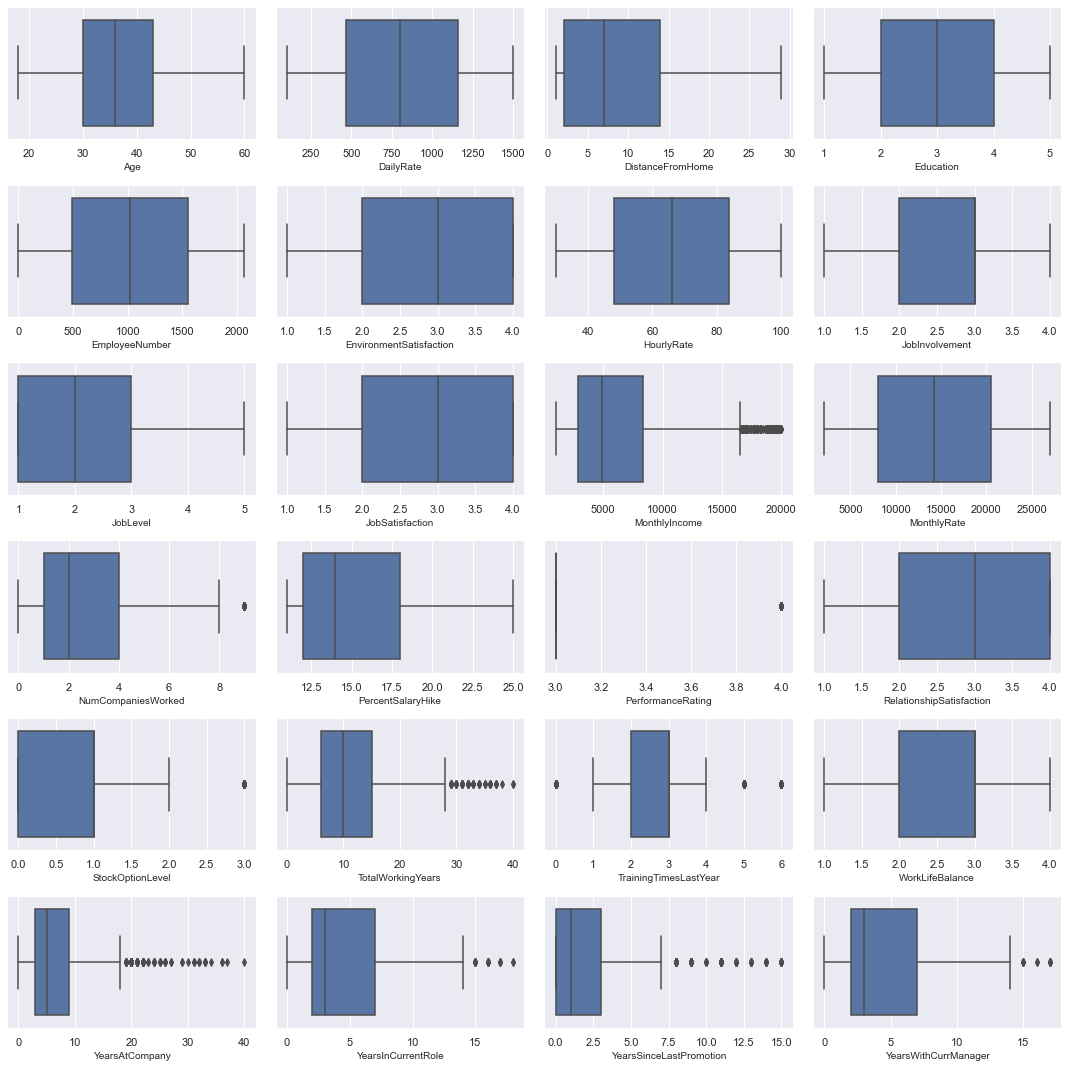

In [24]:
plt.figure(figsize = (15,15))
pltnumber = 1

for column in num:
    if pltnumber<=24:
        ax = plt.subplot(6,4,pltnumber)       
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

* It is confirmed that most of the columns are having outliers and we will confirm monthly income column with different plot as We are seeing outliers on >15k and In perspective of Employee,some or few will get salary > 15K as well.

* We will check for performance rating as well as it is not having more value.
* We can see outliers in other column like years at company, years in current role, years since last promotion, years with current manager, total working years.We will try to remove these outliers as it will result in more data loss.

* We will treat the outliers which is having more first in order to avoid data loss >. 10 %

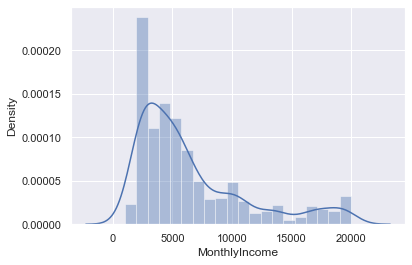

In [25]:
# We can see that salary near to 20k is possible.so we will leave this column as it will result in important data loss

sns.distplot(num['MonthlyIncome'])
plt.show()

Tried applying Z-SCore Method and it result in losing all data from this dataset,so going with the simple quantile method for treating outliers.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

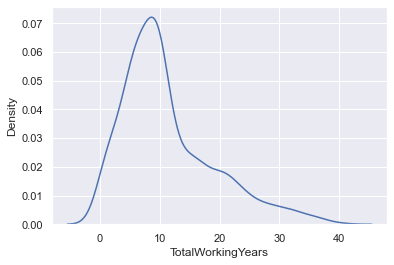

In [26]:
sns.kdeplot(num['TotalWorkingYears'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

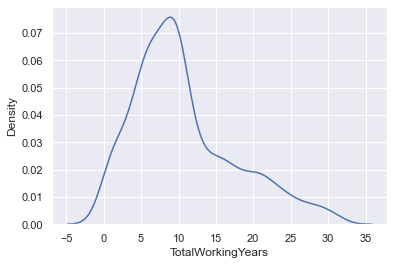

In [27]:
q = num['TotalWorkingYears'].quantile(0.98)
n = num['TotalWorkingYears'][num['TotalWorkingYears']< q]
sns.kdeplot(n)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

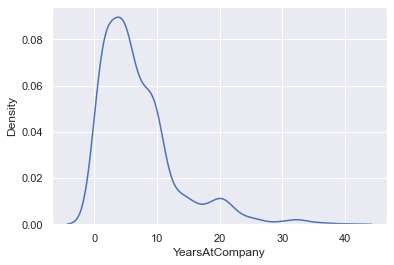

In [28]:
sns.kdeplot(num['YearsAtCompany'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

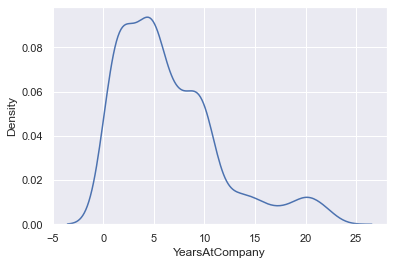

In [29]:
q = num['YearsAtCompany'].quantile(0.98)
n = num['YearsAtCompany'][num['YearsAtCompany']<q]
sns.kdeplot(n)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

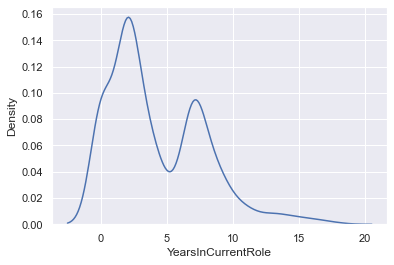

In [30]:
sns.kdeplot(num['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

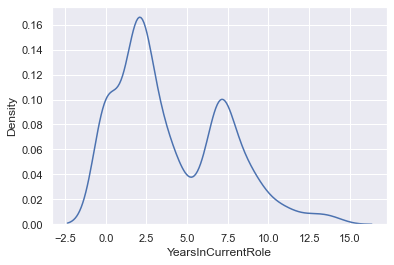

In [31]:
q = num['YearsInCurrentRole'].quantile(0.99)
n = num['YearsInCurrentRole'][num['YearsInCurrentRole']<q]
sns.kdeplot(n)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

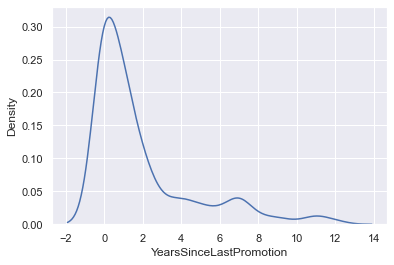

In [32]:
q = num['YearsSinceLastPromotion'].quantile(0.98)
n = num['YearsSinceLastPromotion'][num['YearsSinceLastPromotion']<q]
sns.kdeplot(n)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

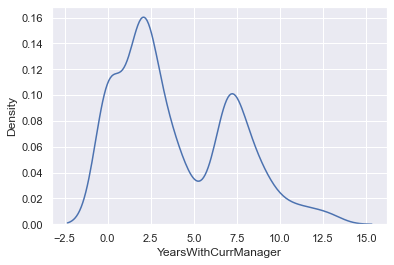

In [33]:
q = num['YearsWithCurrManager'].quantile(0.99)
n = num['YearsWithCurrManager'][num['YearsWithCurrManager']<q]
sns.kdeplot(n)


In [34]:
num['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

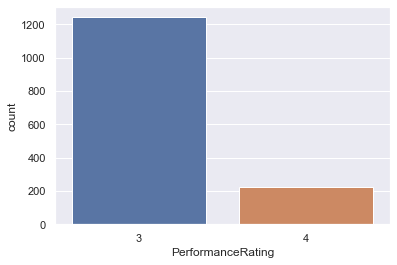

In [35]:
# This plot clearly states that we have only 2 values - 3 and 4 and employees have more 3rd performance rating.

sns.countplot(num['PerformanceRating'])

In [36]:
#Applying quantile to the outliers column to remove the outliers

q1 = num['TotalWorkingYears'].quantile(0.98)
q2 = num['YearsAtCompany'].quantile(0.98)
q3 = num['YearsInCurrentRole'].quantile(0.99)
q4 = num['YearsSinceLastPromotion'].quantile(0.99)
q5 = num['YearsWithCurrManager'].quantile(0.99)

In [37]:
print(num.shape)
num = num[num['TotalWorkingYears']<q1]
print(num.shape)
num = num[num['YearsAtCompany']<q2]
print(num.shape)
num = num[num['YearsInCurrentRole']<q3]
print(num.shape)
num = num[num['YearsSinceLastPromotion']<q4]
print(num.shape)
num = num[num['YearsWithCurrManager']<q5]
print(num.shape)

(1470, 24)
(1433, 24)
(1415, 24)
(1399, 24)
(1392, 24)
(1381, 24)


* We are losing around 9% data and checking the skewness and trying to remove this as well through SKEW() method,

In [38]:
num.skew()

Age                         0.478728
DailyRate                  -0.013722
DistanceFromHome            0.955404
Education                  -0.288045
EmployeeNumber              0.014997
EnvironmentSatisfaction    -0.329008
HourlyRate                 -0.029552
JobInvolvement             -0.500181
JobLevel                    1.120509
JobSatisfaction            -0.345095
MonthlyIncome               1.565037
MonthlyRate                 0.040865
NumCompaniesWorked          1.041833
PercentSalaryHike           0.804336
PerformanceRating           1.932220
RelationshipSatisfaction   -0.292509
StockOptionLevel            0.965432
TotalWorkingYears           0.946971
TrainingTimesLastYear       0.575737
WorkLifeBalance            -0.549527
YearsAtCompany              1.174804
YearsInCurrentRole          0.721823
YearsSinceLastPromotion     1.867160
YearsWithCurrManager        0.663176
dtype: float64

In [39]:
# t+Applying Power transform method to remove the skewness for all columns

from sklearn.preprocessing import power_transform
num1 = power_transform(num, method ='yeo-johnson')

num1= pd.DataFrame(num1,columns=num.columns)

In [40]:
num1.skew()

Age                        -0.003758
DailyRate                  -0.197808
DistanceFromHome           -0.009741
Education                  -0.105063
EmployeeNumber             -0.288942
EnvironmentSatisfaction    -0.205386
HourlyRate                 -0.106071
JobInvolvement             -0.018105
JobLevel                    0.108300
JobSatisfaction            -0.217226
MonthlyIncome               0.026151
MonthlyRate                -0.173636
NumCompaniesWorked          0.016234
PercentSalaryHike           0.111547
PerformanceRating           0.000000
RelationshipSatisfaction   -0.190738
StockOptionLevel            0.092163
TotalWorkingYears          -0.015029
TrainingTimesLastYear       0.057031
WorkLifeBalance            -0.012593
YearsAtCompany             -0.027781
YearsInCurrentRole         -0.070226
YearsSinceLastPromotion     0.218797
YearsWithCurrManager       -0.073592
dtype: float64

In [41]:
# Concatinating categorical and numerical data into a single DataFrame.

df = pd.concat([num1,cat],axis = 1)
df

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.621347,0.750391,-1.496233,-0.897059,-2.164922,-0.719045,1.358370,0.327672,0.359680,1.186688,...,-1.072138,0.583518,1,2,2,1,0,7,2,1
1,1.386711,-1.346853,0.238943,-1.754073,-2.155002,0.200073,-0.204769,-1.065364,0.359680,-0.726125,...,0.179775,1.023455,0,1,1,1,1,6,1,0
2,0.191619,1.337072,-1.035708,-0.897059,-2.137809,1.209993,1.267088,-1.065364,-1.140023,0.181956,...,-1.072138,-1.529162,1,2,1,4,1,2,2,1
3,-0.277895,1.377078,-0.705745,1.105872,-2.130044,1.209993,-0.454433,0.327672,-1.140023,0.181956,...,1.003235,-1.529162,0,1,1,1,0,6,1,1
4,-1.077598,-0.468821,-1.035708,-1.754073,-2.115615,-1.528958,-1.285222,0.327672,-1.140023,-0.726125,...,0.702701,-0.351328,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,1,3,1,2,1,0
1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,2,1,3,1,0,1,0
1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,2,1,1,1,4,1,1
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,2,3,1,7,1,0


In [42]:
df = df.dropna()
df= df.reset_index(drop= True)

In [43]:
 # Dropping this column as it is not having any data and we have only 3 and 4 as rating and that too removed in skewness.

df = df.drop(columns = ['PerformanceRating'], axis = 1)   

In [44]:
df.shape     # shape of dataset

(1381, 31)

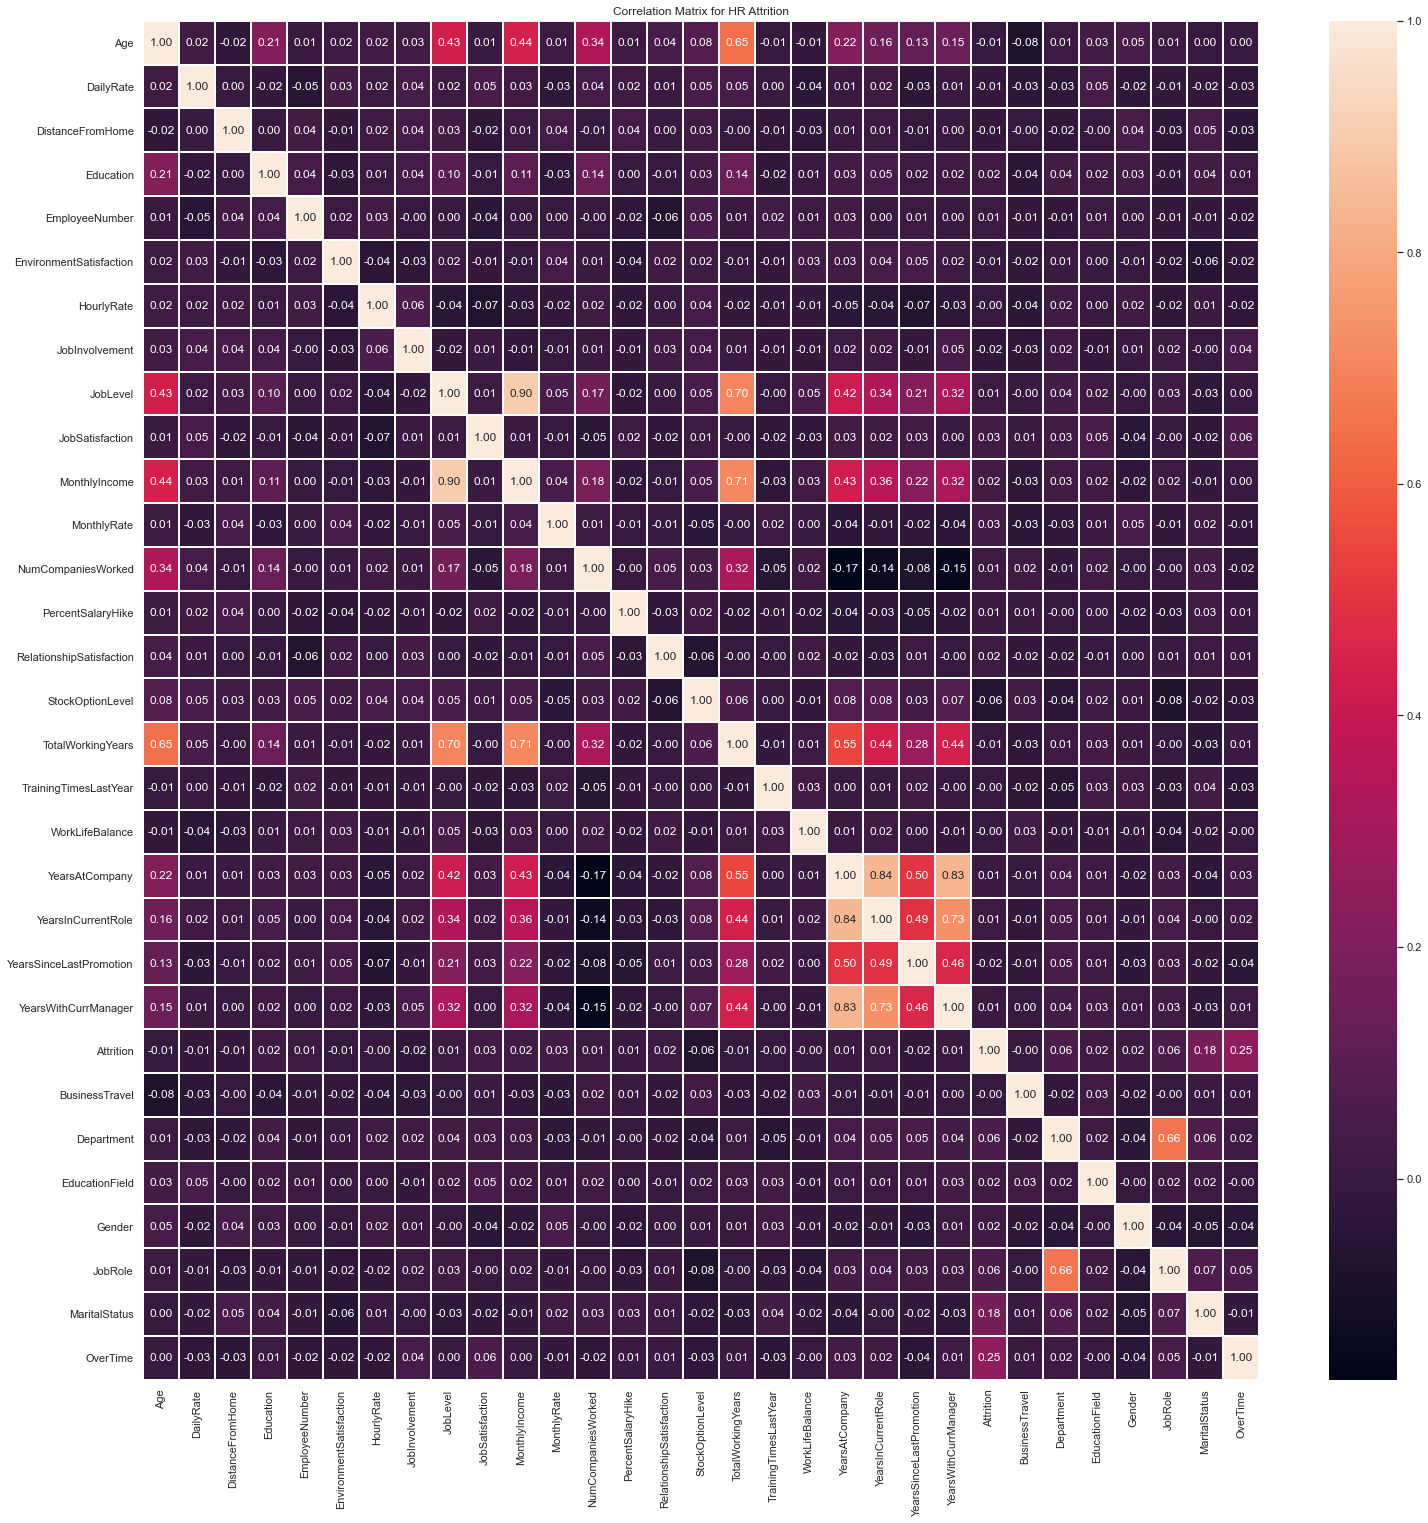

In [45]:
# Checking the correlation Matrix to see features vs features OR features vs target

corr = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix for HR Attrition")
plt.show()

* Splitting X and Y 

In [46]:
x = df.drop(columns = ['Attrition'], axis = 1)
y = df['Attrition']

In [47]:
y.value_counts()

0    1152
1     229
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

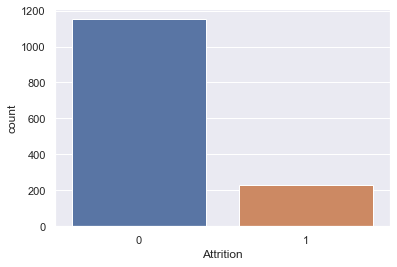

In [48]:
# As discussed earlier, We can see class imbalnce here, So let's do over sampling technique to equalize both the classes

sns.countplot(df['Attrition'])

In [49]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [50]:
y_over.value_counts()

1    1152
0    1152
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

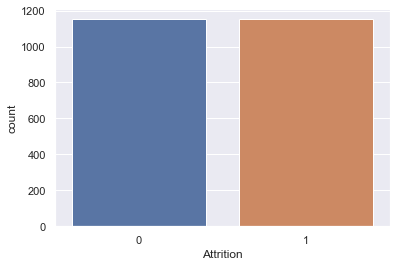

In [51]:
# Now the class has been balance, lets go and build a model
sns.countplot(y_over)

In [52]:
# Scaling the X features,

scaler = StandardScaler()
x_sc = scaler.fit_transform(x_over)

Train test Split and applying test size is given as 25% data.

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_sc, y_over, test_size = 0.25, random_state = 125)

# Model Building :

* Here comes the most important part of building a model and we will see cross validation score to check whether model will be under-fitting or over-fitting and based on that, we will check hyper-parameter tuning to test the accuracy.


* I am using Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Ada Boost Classifier algorithms to build the model.

Model 1: Support Vector Classifier

In [54]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8576388888888888
Confusion Matrix 
 [[246  47]
 [ 35 248]]
Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       293
           1       0.84      0.88      0.86       283

    accuracy                           0.86       576
   macro avg       0.86      0.86      0.86       576
weighted avg       0.86      0.86      0.86       576

ROC AUC Score 
 0.8579577660126148


Model 2: Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.7777777777777778
Confusion Matrix 
 [[220  73]
 [ 55 228]]
Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       293
           1       0.76      0.81      0.78       283

    accuracy                           0.78       576
   macro avg       0.78      0.78      0.78       576
weighted avg       0.78      0.78      0.78       576

ROC AUC Score 
 0.7782534762840845


Model 3: Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.9149305555555556
Confusion Matrix 
 [[289   4]
 [ 45 238]]
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       293
           1       0.98      0.84      0.91       283

    accuracy                           0.91       576
   macro avg       0.92      0.91      0.91       576
weighted avg       0.92      0.91      0.91       576

ROC AUC Score 
 0.9136687610800902


Model 4: Ada Boost Classifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8229166666666666
Confusion Matrix 
 [[258  35]
 [ 67 216]]
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       293
           1       0.86      0.76      0.81       283

    accuracy                           0.82       576
   macro avg       0.83      0.82      0.82       576
weighted avg       0.83      0.82      0.82       576

ROC AUC Score 
 0.8218984792387752


ROC - CURVE for all models

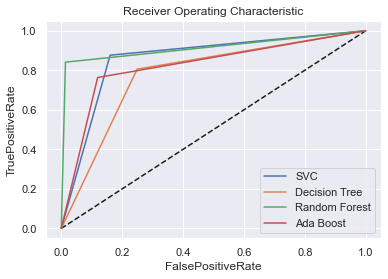

In [58]:
y_pred_prob1 = svm.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rfc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = abc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)



plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "SVC")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "Ada Boost")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

# Applying Cross Validation Score to check model is over-fitting / under-fitting

    ** we can see that support vector classifier has better score than other models

In [59]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,x_over,y_over,cv=5)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.7447910968593794


In [60]:
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : 0.5980401773083089


In [61]:
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)
print("CV Score of RFC :", scr_rfc.mean())

CV Score of RFC : 0.7203913986607564


In [62]:
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)
print("CV Score of ABC :", scr_abc.mean())

CV Score of ABC : 0.46094218617372434


Here I am identifying the best model using the model accuracy score and the cross validation score difference, The less difference is best model.

based on the above methodology, SUPPORT VECTOR CLASSIFIER() model is best model and let's try to improve the model accuracy through Hyper-parameter tuning.

In [63]:
param = {'gamma':['scale','auto'], 'C':[1.0,1.2,1.4,1.6,1.8], 'random_state':[None],
         'max_iter':[-1],
    
}

In [64]:
grid_search = GridSearchCV(svm,param_grid = param, cv=5)

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 1.2, 1.4, 1.6, 1.8],
                         'gamma': ['scale', 'auto'], 'max_iter': [-1],
                         'random_state': [None]})

In [66]:
grid_search.best_params_

{'C': 1.8, 'gamma': 'scale', 'max_iter': -1, 'random_state': None}

In [67]:
final =SVC(C = 1.8 ,gamma = 'scale', max_iter = -1,random_state = None)

final.fit(x_train,y_train)
pred = final.predict(x_test)


print("Accuracy score \n", accuracy_score(y_test,pred))
print("Confusion Matrix \n", confusion_matrix(y_test,pred))
print("Classification Report \n", classification_report(y_test,pred))
print("ROC AUC Score \n", roc_auc_score(y_test,pred))

Accuracy score 
 0.875
Confusion Matrix 
 [[249  44]
 [ 28 255]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       293
           1       0.85      0.90      0.88       283

    accuracy                           0.88       576
   macro avg       0.88      0.88      0.87       576
weighted avg       0.88      0.88      0.87       576

ROC AUC Score 
 0.8754447111036071


On tuning the hyper-paramet further and we have got accuracy of 88% for our final model and it shows that accuracy increased a great extent and We will see the ROC-curve for this final model as well,

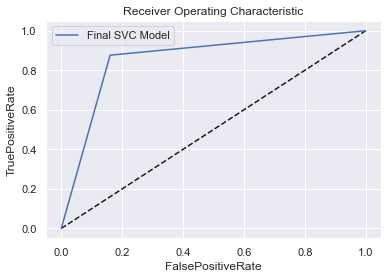

In [68]:
y_pred_fin = final.predict(x_test)
fpr , tpr, thresholds = roc_curve(y_test, y_pred_fin)




plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Final SVC Model")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

Saving the model 

In [69]:
import joblib
joblib.dump(final,"Hr Attrition.pkl")

['Hr Attrition.pkl']